In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
import matplotlib.font_manager
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.weight": "bold",
    "font.family": "serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:

wl, t1,t2,t3 = np.loadtxt("Transmission_of_3_films.txt",unpack=True,skiprows=1) 

#first data row is incomplete. Let's just skip it.


data = np.concatenate((t3,t2,t1)) 
#assemble a data array by concatenating the three data sets.

wl = np.concatenate((wl+6000,wl+3000,wl)) 
#assemble the corresponding wavelength array, taking care of shifting the data sets so that they can be recognized by the function, based on the wavelength value.


In [3]:
#define functions and constants

c = 2.99792458e8

def sqr(v):
    return v*v

def Transmission(x,ns,s1,lam1,alpha0,alpha0_lam,d_lam,d1,d2,d3):
    d = np.where(x<3000,d3,np.where(x<6000,d2,d1)) #This  identifies which data set we need to calculate the transmission for, based on the wavelength
    x = np.where(x<3000,x,np.where(x<6000,x-3000,x-6000)) # data sets are identified by offsets in the wavelength. Remove the offset for the calculations
    
    n = np.sqrt(s1/(1-sqr(lam1/x))+1)
    nu = c/(x*1E-9)
    nu0 = c/(alpha0_lam*1E-9)
    deltanu = c/sqr(alpha0_lam*1E-9)*d_lam*1E-9 # this is the delta_nu corresponding to the wavelength interval d_lam around the abs wavelength of lam0
    alpha = alpha0*np.exp(-sqr((nu-nu0)/deltanu))
    taf = 2*n/(1+n)
    tfs = 2*ns/(n+ns)
    rfa = (1-n)/(1+n)
    rfs = (ns-n)/(ns+n)
    k = 2*np.pi/x * n 
    
    tf = taf*tfs*np.exp(-alpha*d/2)/( 1 - rfa*rfs*np.exp(2*1.j*d*k)*np.exp(-alpha*d) )
    tsa=2*1/(ns+1)
    return sqr(np.abs(tf)*tsa)


In [4]:
model = Model(Transmission)
p = Parameters()
p.add_many(('ns', 1.5, False, None, None, None), # params for first fit, only one oscillator and the correction for the infrared
           ('s1', 2, True, 0, 10, None),
           ('lam1', 400, True, None, None, None),
           ('alpha0', 0.01, True, None, None, None),
           ('alpha0_lam', 500, True, None, None, None),
           ('d_lam', 50, True, None, None, None),
           ('d1', 300, True, None, None, None),
           ('d2', 600, True, None, None, None),
           ('d3', 900, True, None, None, None))

result =model.fit(data, x=wl, params=p ) 


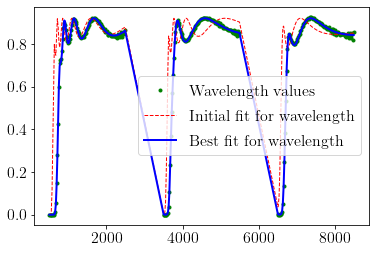

In [5]:
# plots

plt.figure(1)
plt.plot(wl,data,'g.', label="Wavelength values")
plt.plot(wl, result.init_fit, 'r--', linewidth=1, label="Initial fit for wavelength")
plt.plot(wl, result.best_fit, 'b-', linewidth=2, label="Best fit for wavelength")
plt.legend()
plt.show()

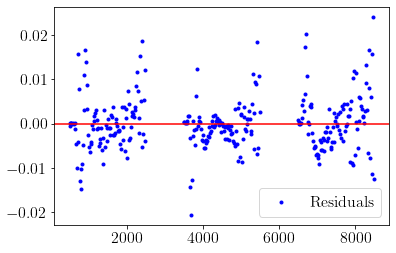

In [6]:
plt.figure(2) # create a second figure, for plotting the residuals
plt.plot(wl, result.best_fit - data, 'b.', label="Residuals") #residuals are the difference between best fit and data
plt.axhline(y=0, xmin=0.0, xmax=1,  color = 'r') # add an horizontal line at zero.
plt.legend()
plt.show()

[[Model]]
    Model(Transmission)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 110
    # data points      = 303
    # variables        = 8
    chi-square         = 0.01068182
    reduced chi-square = 3.6210e-05
    Akaike info crit   = -3090.64232
    Bayesian info crit = -3060.93246
[[Variables]]
    ns:          1.5 (fixed)
    s1:          2.05416746 +/- 0.00714818 (0.35%) (init = 2)
    lam1:        432.886562 +/- 3.30766456 (0.76%) (init = 400)
    alpha0:      0.01984966 +/- 0.00227345 (11.45%) (init = 0.01)
    alpha0_lam:  538.342277 +/- 5.60877887 (1.04%) (init = 500)
    d_lam:       77.1928770 +/- 0.29082345 (0.38%) (init = 50)
    d1:          374.821661 +/- 0.98257962 (0.26%) (init = 300)
    d2:          440.479952 +/- 1.04578082 (0.24%) (init = 600)
    d3:          933.813004 +/- 1.45224926 (0.16%) (init = 900)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha0, alpha0_lam) = -0.987
    C(s1, lam1)           = -0.617
    

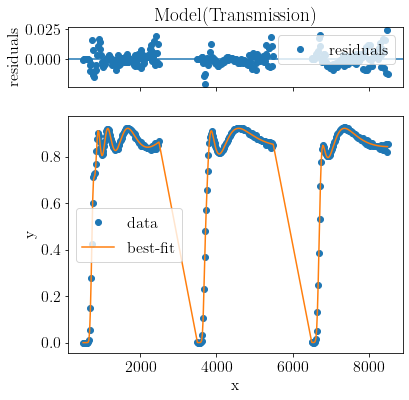

In [7]:
print(result.fit_report())
fig=result.plot() 
#fig.show()